In [1]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
import time


In [2]:
result = pyreadr.read_r("data/point_by_point.RData")

In [3]:
df= result['point_by_point']

In [4]:
#given a list of strings for the server in a set which they won
#determine the win pt percentage by point for service games in the set
def point_by_sgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
#no need to keep track of more than 12 pts as 80% of all games are decided in 8 or fewer points
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="S":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [5]:
#given a list of strings for the returner in a set which they won
#determine the win pt percentage by point within return games in a set
def point_by_rgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
#no need to keep track of more than 12 pts as 80% of all games are decided in 8 or fewer points
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="R":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [6]:
#break up giant string of points into a list of strings representing each game
def get_lst_of_strings_to_decode(x):
    pt_hist_lst_games = x.split(";")
    return pt_hist_lst_games

 A winning player will win the fourth point of a return game 44% of 
the time.  Alternative hytpothis: if you win the fourth point less than 42% of the time, you will lose the set

In [38]:
#let's take a look at the winning players pt% in return games and plot
#notice the odd element indexing assuming our player of choice served the first game
df_return = df[df["winner"]==1].head(1000)
df_return["pt_perc"]=df_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_return["pt_perc_num"]= df_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_return_final=pd.DataFrame(df_return.pt_perc_num.tolist(),columns=columns)
df_return_final
df_return_final.count()
y=df_return_final.mean()[0:8]
a=df_return_final["Pt4"].mean()
a


0.4406166666666666

In [27]:
import random 
import scipy.stats as stats

In [28]:
#get list of all the resamples to be used in bootstrap method
def bootstrap(x, resamples=1000):
    result = x
    for i in range(1, resamples):
        idx = np.random.randint(0,len(x),resamples)
        new_arr = np.take(x,idx)
        result = np.append(result, new_arr)
    result = result.reshape(len(x), resamples)
    return result
        

In [36]:
#get a series of all the means from the bootstrap 2d array 
def bootstrap_ci(sample, stat_func=np.mean, resamples=1000, conf_int=0.95):
    big_data_array = bootstrap(sample, resamples)
    result_array = np.array(list(map(stat_func,big_data_array)))
    return result_array
data=df_return_final["Pt4"].values
type(data)
answer = bootstrap_ci(data)
answer.mean(),answer.std()


(0.4402024500000001, 0.00760515160545432)

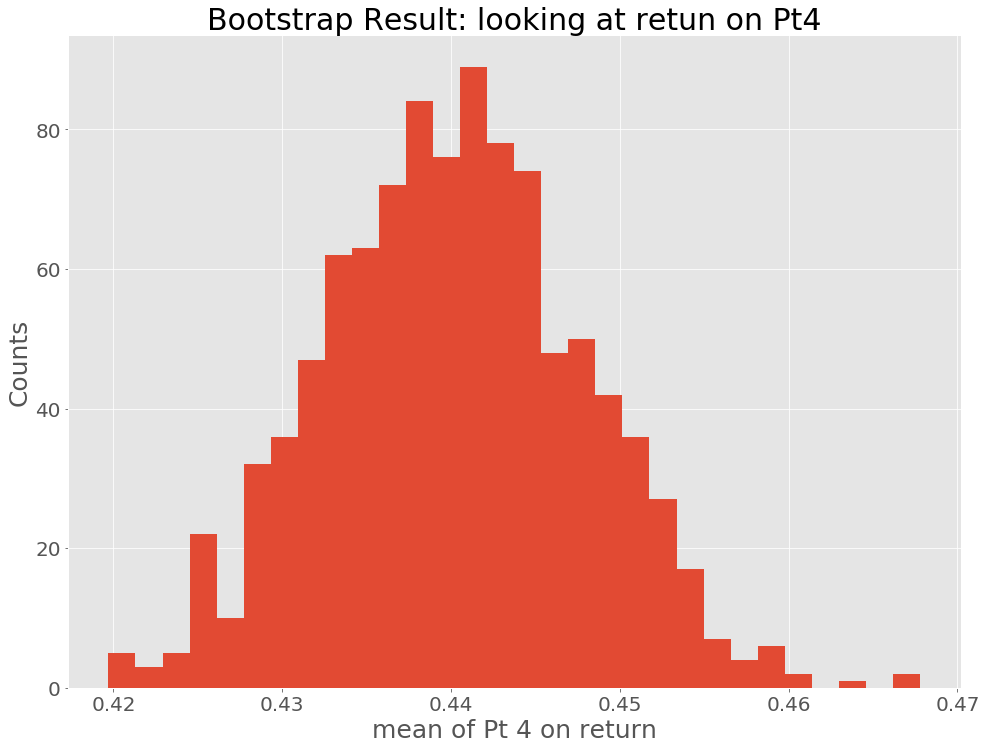

In [63]:
# look at the normal distribution of all the bootstrap means
fig, ax = plt.subplots(1,1,figsize=(16,12))
plt.title("Bootstrap Result: looking at retun on Pt4", fontsize=30)
ax.hist(answer, bins=30)
ax.set_xlabel("mean of Pt 4 on return", fontsize=25)
ax.set_ylabel("Counts",fontsize=25)
plt.tick_params(labelsize=20)
plt.savefig("images/bootstrap.png")
plt.show()

In [42]:
lower_limit =np.percentile(answer,.05)
lower_limit

0.41971665

In [55]:
df_check = df[df["winner"]==2].head(1000)
df_check["pt_perc"]=df_check["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_check["pt_perc_num"]= df_check["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_check_final=pd.DataFrame(df_check.pt_perc_num.tolist(),columns=columns)
df_check_final[df_check_final["Pt4"]<.41971665]
#df_return_final.count()
#y=df_return_final.mean()[0:8]
#a=df_return_final["Pt4"].mean()
#a
#did_indeed_lose_match = 703/1000
#did_indeed_lose_match



,Pt1,Pt2,Pt3,Pt4,Pt5,Pt6,Pt7,Pt8,Pt9,Pt10,Pt11,Pt12
0,0.200000,0.200000,1.000000,0.400000,0.250000,0.500000,1.000000,0.000000,0.0,0.000000,NaN,NaN
1,0.800000,0.400000,0.200000,0.200000,0.750000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.0
6,0.400000,0.000000,0.200000,0.400000,0.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,0.500000,0.250000,0.500000,0.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.666667,0.166667,0.333333,0.166667,0.250000,0.500000,1.000000,0.000000,0.0,1.000000,0.0,0.0
11,0.500000,0.500000,0.750000,0.250000,0.250000,0.333333,0.000000,0.000000,NaN,NaN,NaN,NaN
12,0.250000,1.000000,0.250000,0.250000,0.250000,0.500000,0.000000,1.000000,1.0,0.000000,0.0,1.0
14,0.500000,0.500000,0.250000,0.250000,0.250000,0.333333,1.000000,0.000000,0.0,0.000000,NaN,NaN
